# Investment Case Group Assignment

In [1]:
# Importing Packages:
import pandas as pd
import numpy as np

### Importing Data

Importing companies data:

In [2]:
# cp437 encoding has been applied:
companies = pd.read_table("C:/Users/Karthik Bhat/Documents/PGDDS/Case Project/CP1 Investment/companies.txt", sep ="\t", encoding = "cp437")
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
print(companies.shape)
companies.describe(include = 'all')

(66368, 10)


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Endometabolic-Solutions,Spire,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


Importing round2 data:

In [4]:
rounds2 = pd.read_csv("C:/Users/Karthik Bhat/Documents/PGDDS/Case Project/CP1 Investment/rounds2.csv",encoding='cp437')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [5]:
print(rounds2.shape)
rounds2.describe(include='all')

(114949, 6)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
count,114949,114949,114949,31140,114949,9.495900e+04
unique,90247,114949,14,8,5033,NaN
top,/ORGANIZATION/SOLARFLARE,/funding-round/ef5bb0ec95603e88d60b894e257560ac,venture,A,01-01-2014,NaN
freq,10,1,55494,14747,779,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.042687e+07
std,NaN,NaN,NaN,NaN,NaN,1.148212e+08
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,3.225000e+05
50%,NaN,NaN,NaN,NaN,NaN,1.680511e+06
75%,NaN,NaN,NaN,NaN,NaN,7.000000e+06


### Checkpoint 1: Data Cleaning

We can observe that, permalink column from companies DF and company_permalink has same values in both lower and upper case. Bringing it all in lower case. But before that lets bring data to unique encoding.

In [6]:
# Below is encoding the in utf-8 encoding ascii format and which everdata set is ascii then ignore
companies['name'] = companies.name.str.encode('utf-8').str.decode('ascii', 'ignore')
companies['permalink'] = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
rounds2['company_permalink'] = rounds2.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

In [7]:
# Converting permalink & company_permalink in lower case.
companies['permalink'] = companies['permalink'].str.lower()
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

In [8]:
#After applying encoding and changing the columns permalink and company_permalink to lower case,
#checking for non-English characters
print(len(rounds2.loc[~rounds2['company_permalink'].isin(companies['permalink']),:]))

0


#### Analysis for Table 1.1: Understand the Data Set

In [8]:
# Question 1: How many unique companies are present in rounds2?

rounds2.company_permalink.nunique()

66368

In [9]:
# Question 2: How many unique companies are present in companies?

companies.permalink.nunique()

66368

In [10]:
# Question 3: In the companies data frame, which column can be used as the unique key for each company? 
companies.groupby(['permalink']).count()
#66368 which confirms permalink is unique.
#Answer: permalink

,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
permalink,,,,,,,,,
/organization/-fame,1,1,1,1,1,1,1,1,0
/organization/-qounter,1,1,1,1,1,1,1,1,1
/organization/-the-one-of-them-inc-,1,1,1,1,0,0,0,0,0
/organization/0-6-com,1,1,1,1,1,1,1,1,1
/organization/004-technologies,1,1,1,1,1,1,1,1,1
/organization/01games-technology,1,1,1,1,1,0,1,1,0
/organization/0ndine-biomedical-inc,1,1,1,1,1,1,1,1,1
/organization/0xdata,1,1,1,1,1,1,1,1,1
/organization/1,1,1,1,1,1,1,1,1,1


In [11]:
# Question 4: Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N
df2=set(rounds2['company_permalink'])
df1=set(companies['permalink'])
df2.difference(df1)

set()

With above steps we see that for there are NO companies in the rounds2 file 
which are not present in companies.
So Answer is N(NO)

In [12]:
# Question 5: Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?

master_frame = pd.merge(rounds2,companies, how='left', left_on ='company_permalink', right_on ='permalink')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [13]:
print(master_frame.shape)
print(master_frame.columns)

(114949, 16)
Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd', 'permalink',
       'name', 'homepage_url', 'category_list', 'status', 'country_code',
       'state_code', 'region', 'city', 'founded_at'],
      dtype='object')


In [14]:
# As permalink is a redundant column, dropping the column.
master_frame.drop('permalink',axis=1,inplace=True)
master_frame.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd', 'name',
       'homepage_url', 'category_list', 'status', 'country_code', 'state_code',
       'region', 'city', 'founded_at'],
      dtype='object')

In [15]:
master_frame['funding_round_type'].describe()

count      114949
unique         14
top       venture
freq        55494
Name: funding_round_type, dtype: object

In [16]:
# Count of missing values in raised amount
master_frame['raised_amount_usd'].isnull().sum()

19990

In [19]:
# Keeping a backup
master_frame_bkp = master_frame[:]
master_frame_bkp.shape

(114949, 15)

In [26]:
# Dropping rows with amount missing
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]

In [27]:
# Count of missing values in raised amount verification
master_frame['raised_amount_usd'].isnull().sum()

0

In [28]:
# Columns with no of missing values
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         61753
funded_at                      0
raised_amount_usd              0
name                           1
homepage_url                3251
category_list                  0
status                         0
country_code                   0
state_code                  1731
region                      1184
city                        1181
founded_at                 13369
dtype: int64

In [19]:
master_frame[master_frame['company_permalink']=='/organization/tell-it-in']

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
98692,/organization/tell-it-in,/funding-round/9c987e616755a78c51a4aa67c27a2a93,seed,NaN,01-03-2012,25000.0,NaN,http://tellitin10.com,Startups,closed,USA,OR,"Portland, Oregon",Portland,01-10-2011


As there is only one row in in name that is missing we are not dropping it.

We are dropping all the rows with country code as null. Logic: country is an important field as we are analysing data on basis of english speaking countries.

In [23]:
master_frame=master_frame[~master_frame['country_code'].isnull()]
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         75198
funded_at                      0
raised_amount_usd          16003
name                           1
homepage_url                4220
category_list                  0
status                         0
country_code                   0
state_code                  2213
region                      1455
city                        1452
founded_at                 16063
dtype: int64

We are dropping all the rows with Category list as null. Logic: Category is an important field as we are analysing data on basis of sectors for those.

In [24]:
master_frame=master_frame[~master_frame['category_list'].isnull()]
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         75198
funded_at                      0
raised_amount_usd          16003
name                           1
homepage_url                4220
category_list                  0
status                         0
country_code                   0
state_code                  2213
region                      1455
city                        1452
founded_at                 16063
dtype: int64

In [29]:
# Percentage of data left from original dataset for analysis
(len(master_frame.index)/114949)*100

77.01589400516751

So we are left with 77% of the total data to Analyse further.

### checkpoint 2: Funding Type Analysis

Grouping the dataset as per funding types:

In [30]:
master_funding_type = master_frame.groupby('funding_round_type')

In [31]:
# Listing average funding amount for each of the funding type in Million USD:
master_funding_type['raised_amount_usd'].mean().sort_values(ascending=False).round(2)/1000000

funding_round_type
post_ipo_debt            169.451790
secondary_market          84.438532
private_equity            73.938486
post_ipo_equity           66.077059
debt_financing            17.167653
undisclosed               15.891661
venture                   11.724223
grant                      4.512698
product_crowdfunding       1.353227
convertible_note           1.337187
angel                      0.971574
seed                       0.747794
equity_crowdfunding        0.509898
non_equity_assistance      0.480753
Name: raised_amount_usd, dtype: float64

#### Analysis for Table 2.1

Question 1: Average funding amount of venture type
<br>Answer: 11.72 MN

Question 2: Average funding amount of angel type
<br>Answer: 0.97 MN

Question 3: Average funding amount of seed type
<br>Answer: 0.75 MN

Question 4: Average funding amount of private equity type
<br>Answer: 73.94 MN

In [32]:
#Question 5: Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round,
#which investment type is the most suitable for them?

ds=master_funding_type['raised_amount_usd'].mean().sort_values(ascending=False).round(2)/1000000
ds[(ds>5) & (ds<15)]

#Answer: venture type is most suitable for investing as the average funding ranges between 5 to 15 MN
# rest of the funding types are either too high or too low to be considered.

funding_round_type
venture    11.724223
Name: raised_amount_usd, dtype: float64

### Checkpoint 3: Country Analysis

In [33]:
# List of English speaking countries:
# Used Excel and join functions to get in this format
# ISO 3166-1 alpha-3 codes has been used below:

countries = pd.DataFrame({
    'countries':['Botswana',
'Cameroon',
'Ethiopia',
'Eritrea',
'The Gambia',
'Ghana',
'Kenya',
'Lesotho',
'Liberia',
'Malawi',
'Mauritius',
'Namibia',
'Nigeria',
'Rwanda',
'Seychelles',
'Sierra Leone',
'South Africa',
'South Sudan',
'Sudan',
'Swaziland',
'Tanzania',
'Uganda',
'Zambia',
'Zimbabwe',
'Antigua and Barbuda',
'The Bahamas',
'Barbados',
'Belize',
'Canada',
'Dominica',
'Grenada',
'Guyana',
'Jamaica',
'Saint Kitts and Nevis',
'Saint Lucia',
'Saint Vincent and the Grenadines',
'Trinidad and Tobago',
'United States',
'India',
'Pakistan',
'Philippines',
'Singapore',
'Australia',
'Fiji',
'Kiribati',
'Marshall Islands',
'Federated States of Micronesia',
'Nauru',
'New Zealand',
'Palau',
'Papua New Guinea',
'Samoa',
'Solomon Islands',
'Tonga',
'Tuvalu',
'Vanuatu',
'Ireland',
'Malta',
'United Kingdom'
],'Continent':['Africa',
'Africa',
'Africa',
'Africa',
'Africa',
'Africa',
'Africa',
'Africa',
'Africa',
'Africa',
'Africa',
'Africa',
'Africa',
'Africa',
'Africa',
'Africa',
'Africa',
'Africa',
'Africa',
'Africa',
'Africa',
'Africa',
'Africa',
'Africa',
'Americas',
'Americas',
'Americas',
'Americas',
'Americas',
'Americas',
'Americas',
'Americas',
'Americas',
'Americas',
'Americas',
'Americas',
'Americas',
'Americas',
'Asia',
'Asia',
'Asia',
'Asia',
'Australia/Oceania',
'Australia/Oceania',
'Australia/Oceania',
'Australia/Oceania',
'Australia/Oceania',
'Australia/Oceania',
'Australia/Oceania',
'Australia/Oceania',
'Australia/Oceania',
'Australia/Oceania',
'Australia/Oceania',
'Australia/Oceania',
'Australia/Oceania',
'Australia/Oceania',
'Europe',
'Europe',
'Europe'
], 'alpha_code':['BWA',
'CMR',
'ETH',
'ERI',
'GMB',
'GHA',
'KEN',
'LSO',
'LBR',
'MWI',
'MUS',
'NAM',
'NGA',
'RWA',
'SYC',
'SLE',
'ZAF',
'SDN',
'SDN',
'SWZ',
'TZA',
'UGA',
'ZMB',
'ZWE',
'ATG',
'BHS',
'BRB',
'BLZ',
'CAN',
'DMA',
'GRD',
'GUY',
'JAM',
'KNA',
'LCA',
'VCT',
'TTO',
'USA',
'IND',
'PAK',
'PHL',
'SGP',
'AUS',
'FJI',
'KIR',
'MHL',
'FSM',
'NRU',
'NZL',
'PLW',
'PNG',
'WSM',
'SLB',
'TON',
'TUV',
'VUT',
'IRL',
'MLT',
'GBR'
]})
countries.head()

,Continent,alpha_code,countries
0,Africa,BWA,Botswana
1,Africa,CMR,Cameroon
2,Africa,ETH,Ethiopia
3,Africa,ERI,Eritrea
4,Africa,GMB,The Gambia


In [31]:
# Extracting Countries Table for Tableau
countries.to_csv('C:/Users/Karthik Bhat/Documents/PGDDS/Case Project/CP1 Investment/Countries.csv')

To find out top 9 countries in venture type fundings, sum of fundings is calculated for each country.

In [34]:
# Investment in English speaking countries:
master_venture = master_frame[master_frame['funding_round_type']=='venture']
master_venture_country = master_venture.groupby('country_code')
top9 = master_venture_country['raised_amount_usd'].sum().sort_values(ascending=False).head(9).astype('int64')
top9 = pd.DataFrame(top9)
top9

,raised_amount_usd
country_code,
USA,420068029342
CHN,39338918773
GBR,20072813004
IND,14261508718
CAN,9482217668
FRA,7226851352
ISR,6854350477
DEU,6306921981
JPN,3167647127


In [35]:
top3_eng = pd.merge(top9,countries,left_index=True,right_on='alpha_code',how='inner').head(3)
top3_eng

,raised_amount_usd,Continent,alpha_code,countries
37,420068029342,Americas,USA,United States
58,20072813004,Europe,GBR,United Kingdom
38,14261508718,Asia,IND,India


Top 3 English Speaking Countries:
    1. USA - United States
    2. GBR - United Kingdom
    3. IND - India

### Checkpoint 4: Sector Analysis 1

In [36]:
#Extracting the primary sector of each category list from the category_list column
master_frame_temp = master_frame['category_list'].str.split('|', n=-1, expand = True)
master_frame['primary'] = master_frame_temp[0]
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,Games
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,Biotechnology
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,Analytics


In [37]:
#Reading mappings.csv file into a dataframe
mapping = pd.read_csv("C:/Users/Karthik Bhat/Documents/PGDDS/Case Project/CP1 Investment/mapping.csv")
mapping.head()
mapping.describe(include = 'all')

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
count,687,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
unique,687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Ride Sharing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.031977,0.001453,0.077035,0.129360,0.091570,0.058140,0.104651,0.283430,0.222384
std,NaN,0.176066,0.038125,0.266841,0.335843,0.288627,0.234177,0.306326,0.450991,0.416150
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


Checking and Cleaning Mapping Dataset

In [38]:
#Dropping the row containing NaN for Category_list column
mapping.dropna(subset = ['category_list'], inplace=True) 

In [39]:
mapping.shape

(687, 10)

In [38]:
#to check for random characters in category_list column in mapping dataframe for handling such values

mapping[mapping['category_list'].str.contains('[A-Za-z]{1,}0[A-Za-z]{1,}')]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
20,Alter0tive Medicine,0,0,0,0,1,0,0,0,0
22,A0lytics,0,0,0,0,0,0,0,0,1
59,Big Data A0lytics,0,0,0,0,0,0,0,0,1
79,Business A0lytics,0,0,0,0,0,0,0,0,1
89,Can0bis,0,0,0,0,1,0,0,0,0
91,Career Ma0gement,0,0,0,0,0,0,0,0,1
114,Cloud Ma0gement,0,0,0,0,0,0,1,0,0
145,Contact Ma0gement,0,0,0,0,0,0,0,0,1
198,Digital Rights Ma0gement,0,0,0,1,0,0,0,0,0
199,Digital Sig0ge,0,0,0,1,0,0,0,0,0


This shows that in all the category_list the 'na' has been replaced with 0 such as A0lytics, 
<br>So we will replace 0 with na in further step for column category_list

In [40]:
#Replace 0 in column category_list as identified above as data issue with na, 
#so now A0lytics becomes Analytics

mapping['category_list'] = mapping['category_list'].str.replace('0','na')
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1
10,Advertising Exchanges,0,0,0,0,0,0,0,0,1


In [41]:
#Dropping blank column as not required for Analysis

mapping.drop('Blanks', axis = 1 ,inplace=True)

In [42]:
#Using pd.melt to transpose the Main Sector columns to rows and 
#then retaining values in mapping dataframe for the Main Sector is assigned as 1

mapping_temp = pd.melt(mapping,id_vars='category_list',value_vars = ['Automotive & Sports',
                                                                     'Cleantech / Semiconductors',
                                                                     'Entertainment',
                                                                     'Health',
                                                                     'Manufacturing',
                                                                     'News, Search and Messaging',
                                                                     'Others',
                                                                     'Social, Finance, Analytics, Advertising'],
                       var_name ='Main_Sector', value_name ='Value')

mapping = mapping_temp.loc[mapping_temp['Value'] == 1]

In [43]:
#Dropping the Value Column created by above step while using pd.melt as this column is not required
mapping = mapping.drop(['Value'], axis = 1)

In [44]:
#Reset the index values to start from 0
mapping = mapping.reset_index(drop=True)

In [45]:
mapping.shape

(687, 2)

In [46]:
#Setting up the category_list column as index
mapping.set_index('category_list',inplace=True)
mapping

,Main_Sector
category_list,
Adventure Travel,Automotive & Sports
Aerospace,Automotive & Sports
Auto,Automotive & Sports
Automated Kiosk,Automotive & Sports
Automotive,Automotive & Sports
Bicycles,Automotive & Sports
Boating Industry,Automotive & Sports
CAD,Automotive & Sports
Cars,Automotive & Sports


In [47]:
# Calculating blanks in Primary
master_frame['primary'].isnull().sum()

0

In [48]:
# Keeping a backup
master_frame_bkp2 = master_frame[:]
master_frame_bkp2.shape

(88529, 16)

In [49]:
#Creating New Dataframe by merging Master and Mapping dataframe to map primary sector to Main Sector

master_frame = pd.merge(master_frame,mapping, left_on = 'primary', right_index = True, how='inner')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary,Main_Sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
942,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
943,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
944,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
1033,/organization/a-dance-for-me,/funding-round/9ab9dbd17bf010c79d8415b2c22be6fa,equity_crowdfunding,NaN,26-03-2014,1090000.0,A Dance for Me,http://www.adanceforme.com/,Media|News|Photo Sharing|Video,operating,USA,MT,Missoula,Missoula,31-07-2011,Media,Entertainment


In [49]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary,Main_Sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
942,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
943,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
944,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
1033,/organization/a-dance-for-me,/funding-round/9ab9dbd17bf010c79d8415b2c22be6fa,equity_crowdfunding,NaN,26-03-2014,1090000.0,A Dance for Me,http://www.adanceforme.com/,Media|News|Photo Sharing|Video,operating,USA,MT,Missoula,Missoula,31-07-2011,Media,Entertainment
4053,/organization/akira-mobile,/funding-round/bfb170aea580e381e5b1810c87855c9e,seed,NaN,01-08-2012,18410.0,Akira Mobile,http://www.akira.lt/en,Media|Mobile|SMS|Telecommunications,operating,LTU,NaN,NaN,NaN,NaN,Media,Entertainment
4485,/organization/all-day-media,/funding-round/2760c0426a124b84c540bd4fd2dfe6e5,seed,NaN,16-12-2014,2000000.0,ALL DAY MEDIA,http://allday.com/,Media|Social Media,operating,USA,CA,Los Angeles,Los Angeles,01-01-2013,Media,Entertainment
4486,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment
5187,/organization/america-s-real-deal,/funding-round/5fbb191b97ca9789a7196de703983240,equity_crowdfunding,NaN,19-08-2011,670000.0,America's Real Deal,http://americasrealdeal.com/,Media|News,operating,USA,UT,Salt Lake City,Bountiful,03-04-2014,Media,Entertainment
5231,/organization/american-gnuity,/funding-round/07cc3eb3afd8ef5812e2b62b254b2040,equity_crowdfunding,NaN,19-08-2011,670000.0,American Gnuity,http://AmericanGnuity.com,Media|News,operating,USA,UT,Salt Lake City,Bountiful,03-04-2014,Media,Entertainment


In [50]:
master_frame.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd', 'name',
       'homepage_url', 'category_list', 'status', 'country_code', 'state_code',
       'region', 'city', 'founded_at', 'primary', 'Main_Sector'],
      dtype='object')

Exporting the file for further analysis in Tableu

In [51]:
master_frame.to_csv('C:/Users/Karthik Bhat/Documents/PGDDS/Case Project/CP1 Investment/Clean_data.csv')

### Checkpoint 5: Sector Analysis 2

To Recap, we already know that the most suitable funding type for Spark Funds is 'venture' type. Countries in focus are:

1. USA - United States
2. GBR - United Kingdom
3. IND - India

In [51]:
# Creating dataset D1
D1 = master_frame.loc[(master_frame['country_code'] == 'USA') & (master_frame['raised_amount_usd']>=5000000) & (master_frame['raised_amount_usd']<=15000000) & (master_frame['funding_round_type']=='venture')]
D1 = pd.merge(D1,pd.DataFrame(round(D1.groupby('Main_Sector')['raised_amount_usd'].sum(),2)),left_on='Main_Sector',right_index=True,how='left')
D1 = pd.merge(D1,pd.DataFrame(D1.groupby('Main_Sector')['company_permalink'].count()),left_on='Main_Sector',right_index=True,how='left')
D1.rename(index=str,columns={'raised_amount_usd_x':'raised_amount_usd','raised_amount_usd_y':'tot_amt_per_sector_MN','company_permalink_x':'company_permalink','company_permalink_y':'investment_count'},inplace=True)

In [52]:
print(D1.columns)
print(D1.shape)

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd', 'name',
       'homepage_url', 'category_list', 'status', 'country_code', 'state_code',
       'region', 'city', 'founded_at', 'primary', 'Main_Sector',
       'tot_amt_per_sector_MN', 'investment_count'],
      dtype='object')
(12012, 19)


In [53]:
# Creating dataset D2
D2 = master_frame.loc[(master_frame['country_code'] == 'GBR') & (master_frame['raised_amount_usd']>=5000000) & (master_frame['raised_amount_usd']<=15000000) & (master_frame['funding_round_type']=='venture')]
D2 = pd.merge(D2,pd.DataFrame(round(D2.groupby('Main_Sector')['raised_amount_usd'].sum(),2)),left_on='Main_Sector',right_index=True,how='left')
D2 = pd.merge(D2,pd.DataFrame(D2.groupby('Main_Sector')['company_permalink'].count()),left_on='Main_Sector',right_index=True,how='left')
D2.rename(index=str,columns={'raised_amount_usd_x':'raised_amount_usd','raised_amount_usd_y':'tot_amt_per_sector_MN','company_permalink_x':'company_permalink','company_permalink_y':'investment_count'},inplace=True)

In [54]:
print(D2.columns)
print(D2.shape)

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd', 'name',
       'homepage_url', 'category_list', 'status', 'country_code', 'state_code',
       'region', 'city', 'founded_at', 'primary', 'Main_Sector',
       'tot_amt_per_sector_MN', 'investment_count'],
      dtype='object')
(619, 19)


In [55]:
# Creating dataset D3
D3 = master_frame.loc[(master_frame['country_code'] == 'IND') & (master_frame['raised_amount_usd']>=5000000) & (master_frame['raised_amount_usd']<=15000000) & (master_frame['funding_round_type']=='venture')]
D3 = pd.merge(D3,pd.DataFrame(round(D3.groupby('Main_Sector')['raised_amount_usd'].sum(),2)),left_on='Main_Sector',right_index=True,how='left')
D3 = pd.merge(D3,pd.DataFrame(D3.groupby('Main_Sector')['company_permalink'].count()),left_on='Main_Sector',right_index=True,how='left')
D3.rename(index=str,columns={'raised_amount_usd_x':'raised_amount_usd','raised_amount_usd_y':'tot_amt_per_sector_MN','company_permalink_x':'company_permalink','company_permalink_y':'investment_count'},inplace=True)

In [56]:
print(D3.columns)
print(D3.shape)

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd', 'name',
       'homepage_url', 'category_list', 'status', 'country_code', 'state_code',
       'region', 'city', 'founded_at', 'primary', 'Main_Sector',
       'tot_amt_per_sector_MN', 'investment_count'],
      dtype='object')
(328, 19)


In [57]:
#Section 5.1 Table Answer 1: Total number of Investments (count).
print('D1: ')
print(D1.groupby('Main_Sector')['investment_count'].count().sum())
print('D2: ')
print(D2.groupby('Main_Sector')['investment_count'].count().sum())
print('D3: ')
print(D3.groupby('Main_Sector')['investment_count'].count().sum())

D1: 
12012
D2: 
619
D3: 
328


In [59]:
#Section 5.1 Table Answer 2: Total amount of investment (USD in Million)
print('D1:')
print(int(D1['raised_amount_usd'].sum())/1000000)
print('D2:')
print(int(D2['raised_amount_usd'].sum())/1000000)
print('D3:')
print(int(D3['raised_amount_usd'].sum())/1000000)

D1:
107318.294664
D2:
5365.2283
D3:
2949.543602


In [60]:
#Section 5.1 Table Answer 3:Top Sector name (no. of investment-wise)
print('D1:')
Q3D1S1 = D1.loc[D1['investment_count']==sorted(D1['investment_count'].unique(),reverse=True)[0],'Main_Sector'].unique()
print(Q3D1S1)
print('D2:')
Q3D2S1 = D2.loc[D2['investment_count']==sorted(D2['investment_count'].unique(),reverse=True)[0],'Main_Sector'].unique()
print(Q3D2S1)
print('D3:')
Q3D3S1 = D3.loc[D3['investment_count']==sorted(D3['investment_count'].unique(),reverse=True)[0],'Main_Sector'].unique()
print(Q3D3S1)

D1:
['Others']
D2:
['Others']
D3:
['Others']


In [61]:
#Section 5.1 Table Answer 4:Second Sector name (no. of investment-wise)
print('D1:')
Q4D1S2 = D1.loc[D1['investment_count']==sorted(D1['investment_count'].unique(),reverse=True)[1],'Main_Sector'].unique()
print(Q4D1S2)
print('D2:')
Q4D2S2 = D2.loc[D2['investment_count']==sorted(D2['investment_count'].unique(),reverse=True)[1],'Main_Sector'].unique()
print(Q4D2S2)
print('D3:')
Q4D3S2 = D3.loc[D3['investment_count']==sorted(D3['investment_count'].unique(),reverse=True)[1],'Main_Sector'].unique()
print(Q4D3S2)

D1:
['Social, Finance, Analytics, Advertising']
D2:
['Social, Finance, Analytics, Advertising']
D3:
['Social, Finance, Analytics, Advertising']


In [62]:
#Section 5.1 Table Answer 5:Third Sector name (no. of investment-wise)
print('D1:')
Q5D1S3 = D1.loc[D1['investment_count']==sorted(D1['investment_count'].unique(),reverse=True)[2],'Main_Sector'].unique()
print(Q5D1S3)
print('D2:')
Q5D2S3 = D2.loc[D2['investment_count']==sorted(D2['investment_count'].unique(),reverse=True)[2],'Main_Sector'].unique()
print(Q5D2S3)
print('D3:')
Q5D3S3 = D3.loc[D3['investment_count']==sorted(D3['investment_count'].unique(),reverse=True)[2],'Main_Sector'].unique()
print(Q5D3S3)

D1:
['Cleantech / Semiconductors']
D2:
['Cleantech / Semiconductors']
D3:
['News, Search and Messaging']


In [63]:
#Section 5.1 Table Answer 6:Number of investments in top sector (3)
print('D1:')
print(sorted(D1['investment_count'].unique(),reverse=True)[0])
print('D2:')
print(sorted(D2['investment_count'].unique(),reverse=True)[0])
print('D3:')
print(sorted(D3['investment_count'].unique(),reverse=True)[0])

D1:
2950
D2:
147
D3:
110


In [64]:
#Section 5.1 Table Answer 7:Number of investments in second sector (4)
print('D1:')
print(sorted(D1['investment_count'].unique(),reverse=True)[1])
print('D2:')
print(sorted(D2['investment_count'].unique(),reverse=True)[1])
print('D3:')
print(sorted(D3['investment_count'].unique(),reverse=True)[1])

D1:
2714
D2:
133
D3:
60


In [65]:
#Section 5.1 Table Answer 8:Number of investments in third sector (5)
print('D1:')
print(sorted(D1['investment_count'].unique(),reverse=True)[2])
print('D2:')
print(sorted(D2['investment_count'].unique(),reverse=True)[2])
print('D3:')
print(sorted(D3['investment_count'].unique(),reverse=True)[2])

D1:
2300
D2:
128
D3:
52


In [66]:
#Section 5.1 Table Answer 9:For point 3 (top sector count-wise), which company received the highest investment?
print('D1:')
print(D1[D1['Main_Sector']==Q3D1S1[0]].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)/1000000)
print('D2:')
print(D2[D2['Main_Sector']==Q3D2S1[0]].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)/1000000)
print('D3:')
print(D3[D3['Main_Sector']==Q3D3S1[0]].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)/1000000)

D1:
name
Virtustream    64.3
Name: raised_amount_usd, dtype: float64
D2:
name
Electric Cloud    37.0
Name: raised_amount_usd, dtype: float64
D3:
name
FirstCry.com    39.0
Name: raised_amount_usd, dtype: float64


In [67]:
#Section 5.1 Table Answer 10:For point 4 (second best sector count-wise), which company received the highest investment?
print('D1:')
print(D1[D1['Main_Sector']==Q4D1S2[0]].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)/1000000)
print('D2:')
print(D2[D2['Main_Sector']==Q4D2S2[0]].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)/1000000)
print('D3:')
print(D3[D3['Main_Sector']==Q4D3S2[0]].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)/1000000)

D1:
name
SST Inc. (Formerly ShotSpotter)    67.933006
Name: raised_amount_usd, dtype: float64
D2:
name
Celltick Technologies    37.5
Name: raised_amount_usd, dtype: float64
D3:
name
Manthan Systems    50.7
Name: raised_amount_usd, dtype: float64


### Checkpoint 6: Plots

1. A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

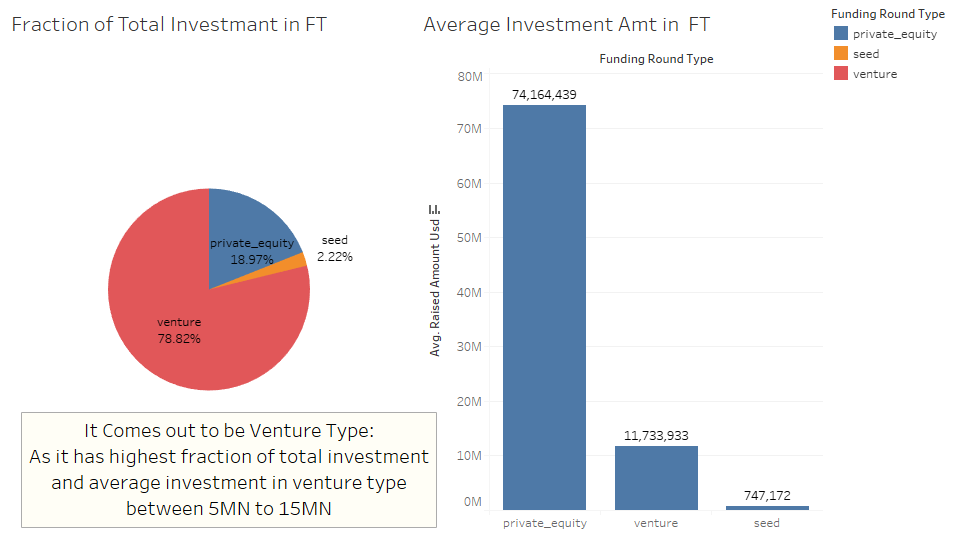

2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

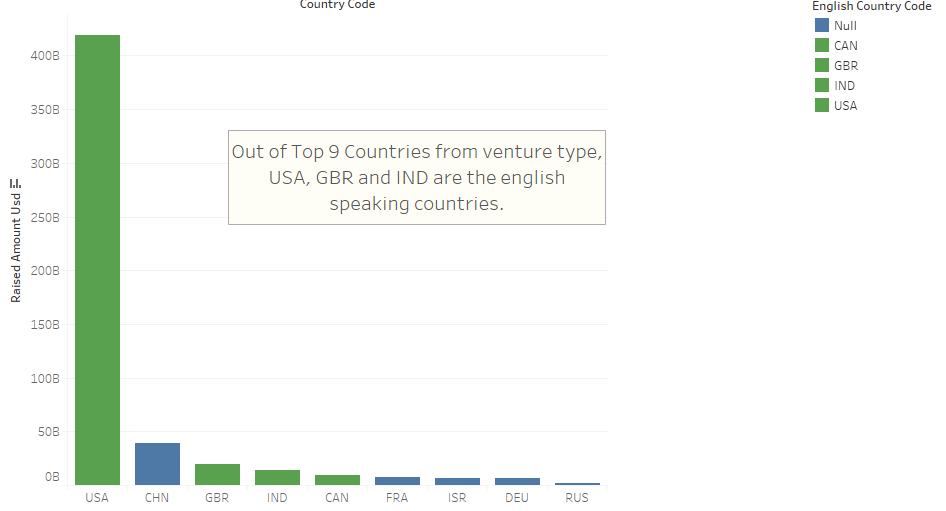

3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).

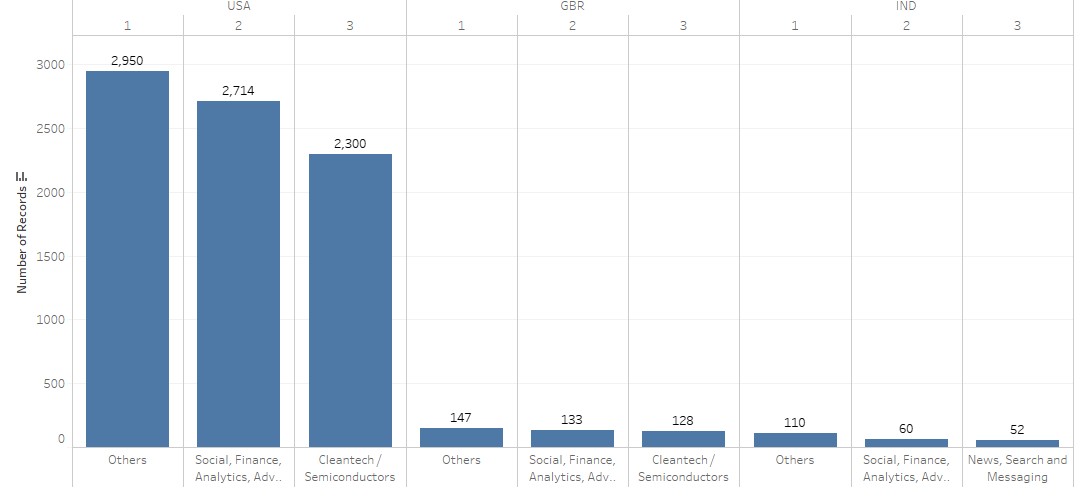